<a href="https://colab.research.google.com/github/FGalvao77/Predizendo-se-o-cliente-assinara-um-deposito-a-prazo-Regressao-Logistica/blob/main/Predizendo_se_o_cliente_assinar%C3%A1_um_dep%C3%B3sito_a_prazo_%7C_Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predizendo se o cliente assinará um depósito a prazo | Regressão Logística**

---



**Regressão logística** é um algoritmo de classificação de aprendizado de máquina usado para prever a probabilidade de uma variável dependente categórica. Na regressão logística, a variável dependente é uma variável binária que contém dados codificados como 1 (sim, sucesso, etc.) ou 0 (não, falha, etc.). Em outras palavras, o modelo de regressão logística prevê P (Y = 1) em função de X.

**Premissas da regressão logística**

- A regressão logística binária requer que a variável dependente seja binária.
- Para uma regressão binária, o nível de fator 1 da variável dependente deve representar o resultado desejado.
- Apenas as variáveis ​​significativas devem ser incluídas.
- As variáveis ​​independentes devem ser independentes umas das outras. Ou seja, o modelo deve ter pouca ou nenhuma multicolinearidade.
- As variáveis ​​independentes são linearmente relacionadas às chances de log.
- A regressão logística requer tamanhos de amostra bastante grandes.

**Conjunto de dados**

O conjunto de dados provém do repositório [UCI Machine Learning](https://archive.ics.uci.edu/ml/index.php) e está relacionado com campanhas de marketing direto (chamadas telefónicas) de uma instituição bancária portuguesa. O objetivo da classificação é prever se o cliente assinará (1/0) um depósito a prazo (variável y).<br>
O conjunto de dados pode ser baixado no link abaixo.

- conjunto de dados:
 - https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
# importando o arquivo do conjunto de dados
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2021-12-23 18:54:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  1.33MB/s    in 0.3s    

2021-12-23 18:54:48 (1.33 MB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [2]:
# descompactando o arquivo
!unzip bank-additional.zip

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


> Note que, temos uma pasta principal com 3 arquivos e, desses utilizaremos o `bank-additional-full.csv` para esse desafio.

In [5]:
# visualizando o conjunto de dados de interesse
!head /content/bank-additional/bank-additional-full.csv

"age";"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
56;"housemaid";"married";"basic.4y";"no";"no";"no";"telephone";"may";"mon";261;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
57;"services";"married";"high.school";"unknown";"no";"no";"telephone";"may";"mon";149;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
37;"services";"married";"high.school";"no";"yes";"no";"telephone";"may";"mon";226;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
40;"admin.";"married";"basic.6y";"no";"no";"no";"telephone";"may";"mon";151;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
56;"services";"married";"high.school";"no";"no";"yes";"telephone";"may";"mon";307;1;999;0;"nonexistent";1.1;93.994;-36.4;4.857;5191;"no"
45;"services";"married";"basic.9y";"unknown";"no";"no";"telephone";"may";"mon";198;1;999;0;"nonex

## **Carregando o conjunto de dados**

In [6]:
# importando biblioteca para ignorar "alertas"
import warnings
warnings.filterwarnings('ignore')

In [7]:
# importando bibliotecas para modelagem (manipulaçã0/matemática) de dados
import pandas as pd
import numpy as np

In [8]:
# configurando a quantidade de casas decimais que serão exibidas
pd.options.display.float_format='{:,.3f}'.format

In [9]:
# instanciando o conjunto de dados na variável "df"
df = pd.read_csv('/content/bank-additional/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,"5,191.000",no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,"5,191.000",no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,"5,191.000",no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,"5,191.000",no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.100,93.994,-36.400,4.857,"5,191.000",no


## **Exploração e Visualização dos dados**

In [10]:
# dimensão do conjunto de dados
df.shape    # linhas e colunas

(41188, 21)

In [11]:
# nomes dos atributos
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [12]:
# contabilizando as instâncias únicas em cada atributo
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [13]:
# tipo de dado em cada atributo
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [29]:
# inspecionando a variável alvo "y" - instâncias presente e contabilizando-as
print(
    df['y'].unique(),
    df['y'].value_counts(),
    round(df['y'].value_counts(normalize=True)*100),
    sep='\n\n'
)

['no' 'yes']

no     36548
yes     4640
Name: y, dtype: int64

no    89.000
yes   11.000
Name: y, dtype: float64


> Perceba que, o atributo alvo possui dados do tipo categórico e, portanto será necessário trata-lo, isso será realizado mais a frente.

Vamos continuar a exploração do conjunto de dados!

**Dicionário de dados:**
- `age`: idade (numérica)
- `job`: tipo de trabalho (categórico: “administrador”, “operário”, “empresário”, “empregada doméstica”, “gestão”, “aposentado”, “autônomo”, “serviços”, “estudante”, “técnico ”,“ Desempregado ”,“ desconhecido ”)
- `marital`: estado civil  (categoria: “divorciado”, “casado”, “solteiro”, “desconhecido”)
- `education`: educação (categórica: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “analfabeto”, “professional.course”, “university.degree”, “unknown”)
- `default`: inadimplência (categórica: “não”, “sim”, “desconhecido”)
- `balance`: saldo
- `housing`: habitação - tem crédito de habitação? (categórica: “não”, “sim”, “desconhecido”)
- `loan`: empréstimo - tem empréstimo pessoal? (categórica: “não”, “sim”, “desconhecido”)
- `contact`: tipo de contato (categórico: “celular”, “telefone”)
- `day`: dia - último dia de contato da semana (categórico: “seg”, “ter”, “qua”, “qui”, “sex”)
- `month`: mês - último mês de contato do ano (categórico: “jan”, “fev”, “mar”,…, “nov”, “dez”)
- `duration`: duração - duração do último contato, em segundos (numérico). Nota importante: este atributo afeta fortemente o destino de saída (por exemplo, se duração = 0, então y = 'não'). A duração não é conhecida antes de uma chamada ser realizada, também, após o final da chamada, y é obviamente conhecido. Assim, esta entrada deve ser incluída apenas para fins de benchmark e deve ser descartada se a intenção for ter um modelo preditivo realista
- `campaign`: campanha -  número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)
- `pdays`: número de dias que se passaram depois que o cliente foi contatado pela última vez em uma campanha anterior (numérico; 999 significa que o cliente não foi contatado anteriormente)
- `previous`: anterior - número de contatos realizados antes desta campanha e para este cliente (numérico)
- `poutcome`: resultado da campanha de marketing anterior (categórica: "fracasso", "inexistente", "sucesso")
- `y`: o cliente subscreveu um depósito a prazo? (binário: “1”, significa “Sim”, “0” significa “Não”)

In [15]:
# instâncias únicas presentes no atributo "education"
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

> Vamos agrupar as instâncias "basic.4y", "basic.9y" e "basic.6y" e chamá-los de `"basic"`.

In [16]:
# agrupando as instâncias "basic.4y", "basic.9y" e "basic.6y"  em "basic"
df['education'] = np.where(df['education'] == 'basic.4y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.6y', 'basic', df['education'])
df['education'] = np.where(df['education'] == 'basic.9y', 'basic', df['education'])

In [17]:
# contabilizando as instâncias
df['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [18]:
# bibliotecas para visualização gráfica
import matplotlib.pyplot as plt
plt.rc('font', size=20)
%matplotlib inline

import seaborn as sns
# sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

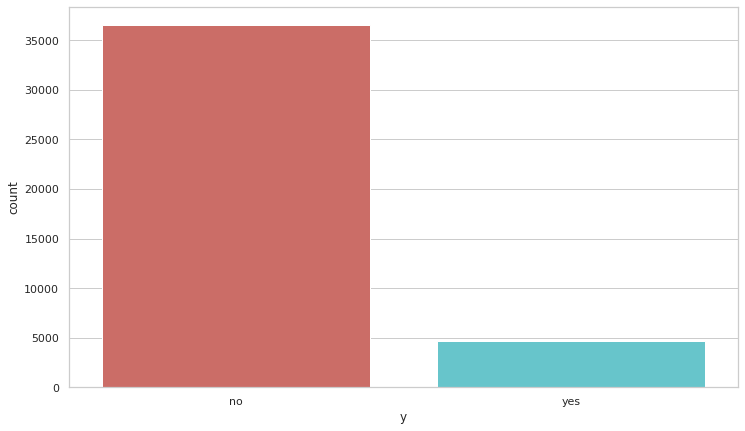

In [19]:
# distribuição das instâncias da variável alvo
plt.figure(figsize=(12, 7))

sns.countplot(x='y', data=df, palette='hls')
plt.savefig('count_plot(var_target)')
plt.show();

In [20]:
count_no_sub = len(df[df['y'] == 'no'])
count_sub = len(df[df['y'] == 'yes'])

count_no_sub, count_sub

(36548, 4640)

In [21]:
pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
round(pct_of_no_sub, 2)

0.89

In [22]:
pct_of_sub = count_sub / (count_no_sub + count_sub)
round(pct_of_sub, 2)

0.11

> Nossas classes são desequilibradas e a proporção de instâncias sem assinatura para instâncias de assinatura é de `89:11`.

Antes de prosseguirmos para equilibrar as classes, vamos explorar mais um pouco o conjunto de dados.

In [30]:
# transformando o tipo de dado do atributo alvo de categórico para numérico
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [32]:
# visualizando a média da distribuição dos atributos referente ao atributo alvo "y" e suas respectivas instâncias
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.911,220.845,2.633,984.114,0.132,0.249,93.604,-40.593,3.811,"5,176.167"
1,40.913,553.191,2.052,792.036,0.493,-1.233,93.354,-39.790,2.123,"5,095.116"


> **Observações:**<br>
- A idade média dos clientes que compraram o depósito a prazo é superior à dos clientes que não o fizeram.<br>
- O atributo `pdays` (dias desde que o cliente foi contatado pela última vez) é compreensivelmente menor para os clientes que o compraram. 
 - Quanto mais baixos forem os dias, melhor será a memória da última chamada e, portanto, melhores serão as chances de venda.<br>
- Surpreendentemente, as campanhas (número de contatos ou ligações realizadas durante a campanha atual) são menores para os clientes que compraram o depósito a prazo.

Vamos explorar outras variáveis utilizando a mesma técnica acima.

In [33]:
# visualizando a média da distribuição dos atributos referente ao atributo "job" e suas respectivas instâncias
df.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,,
admin.,38.187,254.312,2.623,954.319,0.189,0.016,93.534,-40.245,3.550,"5,164.125",0.130
blue-collar,39.556,264.542,2.558,985.160,0.123,0.249,93.657,-41.376,3.772,"5,175.615",0.069
entrepreneur,41.723,263.268,2.536,981.267,0.139,0.159,93.605,-41.284,3.791,"5,176.314",0.085
housemaid,45.500,250.455,2.640,960.579,0.138,0.433,93.677,-39.495,4.010,"5,179.530",0.100
management,42.363,257.058,2.476,962.647,0.185,-0.013,93.523,-40.489,3.611,"5,166.651",0.112
retired,62.027,273.712,2.477,897.936,0.327,-0.698,93.431,-38.573,2.770,"5,122.262",0.252
self-employed,39.949,264.142,2.661,976.621,0.144,0.094,93.560,-40.488,3.689,"5,170.674",0.105
services,37.926,258.398,2.588,979.974,0.155,0.175,93.635,-41.290,3.699,"5,171.600",0.081
student,25.895,283.683,2.104,840.217,0.525,-1.408,93.332,-40.188,1.884,"5,085.939",0.314


In [34]:
# visualizando a média da distribuição dos atributos referente ao atributo "marital" e suas respectivas instâncias
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,,
divorced,44.899,253.790,2.613,968.640,0.169,0.164,93.607,-40.707,3.716,"5,170.879",0.103
married,42.307,257.439,2.573,967.248,0.156,0.184,93.597,-40.271,3.746,"5,171.849",0.102
single,33.159,261.524,2.534,949.910,0.211,-0.168,93.517,-40.919,3.317,"5,155.199",0.140
unknown,40.275,312.725,3.188,937.100,0.275,-0.221,93.471,-40.820,3.313,"5,157.394",0.150


In [35]:
# visualizando a média da distribuição dos atributos referente ao atributo "education" e suas respectivas instâncias
df.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
basic,42.164,263.044,2.559,974.878,0.141,0.191,93.640,-40.928,3.730,"5,172.014",0.087
high.school,37.998,260.887,2.569,964.358,0.186,0.033,93.585,-40.941,3.556,"5,164.995",0.108
illiterate,48.500,276.778,2.278,943.833,0.111,-0.133,93.317,-39.950,3.517,"5,171.778",0.222
professional.course,40.080,252.534,2.586,960.766,0.163,0.173,93.570,-40.124,3.710,"5,170.156",0.113
university.degree,38.879,253.223,2.564,951.808,0.192,-0.028,93.493,-39.976,3.530,"5,163.226",0.137
unknown,43.481,262.391,2.596,942.831,0.226,0.059,93.659,-39.878,3.571,"5,159.550",0.145


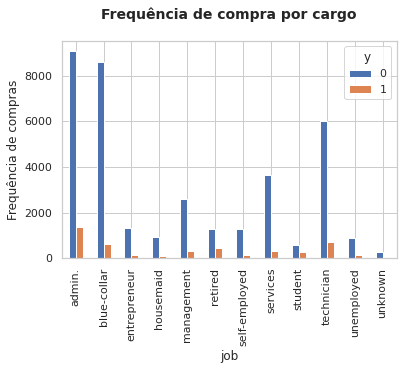

In [36]:
# visualizando a distribuição da variável alvo em relação ao tipo de cargo laboral do cliente
pd.crosstab(df['job'], df['y']).plot(kind='bar')

plt.title('Frequência de compra por cargo\n', 
           {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('job')
plt.ylabel('Frequência de compras')
plt.savefig('freq_compra_cargo');

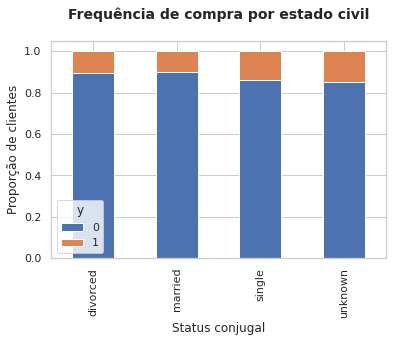

In [37]:
# visualizando a distribuição da variável alvo em relação ao estado civil do cliente
table = pd.crosstab(df['marital'], df['y'])

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frequência de compra por estado civil\n',
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('Status conjugal')
plt.ylabel('Proporção de clientes')
plt.savefig('status_conj_prop_clientes')

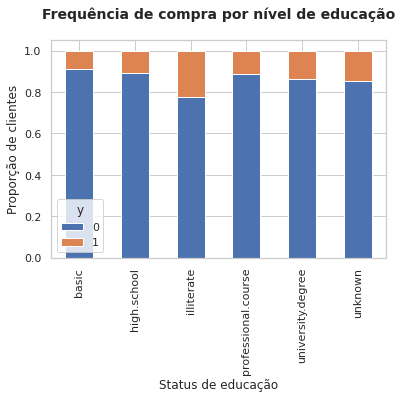

In [38]:
# visualizando a distribuição da variável alvo em relação ao status educacional do cliente
table = pd.crosstab(df['education'], df['y'])

table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Frequência de compra por nível de educação\n',
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('Status de educação')
plt.ylabel('Proporção de clientes')
plt.savefig('status_educ_prop_clientes')

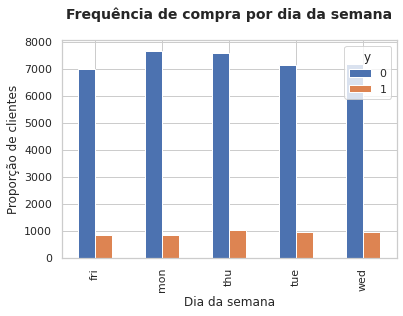

In [39]:
# visualizando a distribuição da variável alvo em relação ao dia da semana que foi realizado a contratação do serviço
pd.crosstab(df['day_of_week'], df['y']).plot(kind='bar')

plt.title('Frequência de compra por dia da semana\n',
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('Dia da semana')
plt.ylabel('Proporção de clientes')
plt.savefig('dia_sem_prop_clientes')

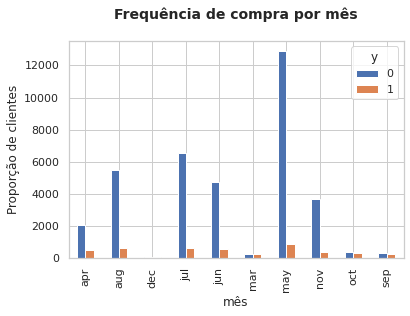

In [40]:
# visualizando a distribuição da variável alvo em relação ao mês de contratação do serviço
pd.crosstab(df['month'], df['y']).plot(kind='bar')

plt.title('Frequência de compra por mês\n', 
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('mês')
plt.ylabel('Proporção de clientes')
plt.savefig('mes_prop_clientes')

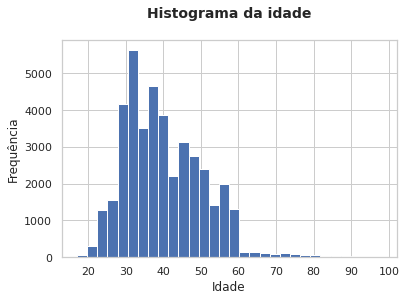

In [42]:
# visualizando a distribuição da variável "age" (idade)
df['age'].hist(bins=30)

plt.title('Histograma da idade\n', 
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.savefig('hist_idade')

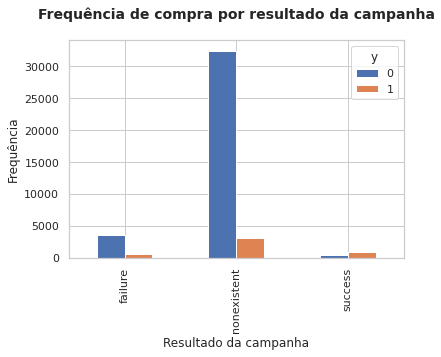

In [43]:
# visualizando a distribuição da variável alvo em relação ao resultado da campanha
pd.crosstab(df['poutcome'], df['y']).plot(kind='bar')

plt.title('Frequência de compra por resultado da campanha\n', 
          {'fontsize': 14,'fontweight': 'bold'})
plt.xlabel('Resultado da campanha')
plt.ylabel('Frequência')
plt.savefig('res_freq_camp_bar')

## **Engenharia de recursos**

In [44]:
# função para separar as colunas numéricas e categóricas do conjunto de dados
def separate_cols(df):
    cols_cats = []
    cols_nums = []

    for col in df.columns[:-1]: # excluindo a variável alvo  
        if df.dtypes[col] == 'object':
            cols_cats.append(col)
        else:
            cols_nums.append(col)
    
    return f'cols categ: {len(cols_cats), cols_cats}', f'cols nums: {len(cols_nums), cols_nums}'

In [45]:
# aplicando a função
separate_cols(df)

("cols categ: (10, ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])",
 "cols nums: (10, ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'])")

In [46]:
# instanciando as variáveis categóricas
cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
            'contact', 'month', 'day_of_week', 'poutcome']

In [47]:
# realizando o "one hot" nos atributos caregóricos e instanciando o resultado no objeto "dummies"
dummies = pd.get_dummies(df[cat_vars])

# concatenando o objeto "dummies" no conjunto de dados
data = pd.concat([df, dummies], axis=1)

data_vars = data.columns.values.tolist()

to_keep = [i for i in data_vars if i not in cat_vars]

In [48]:
df_final = data[to_keep]
df_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',

In [49]:
# total de atributos após aplicado a função ".get_dummies()"
len(df_final.columns)

62

In [50]:
# cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
#             'contact', 'month', 'day_of_week', 'poutcome']

# for var in cat_vars:
#     cat_list = 'var' + '_' + var
#     cat_list = pd.get_dummies(df[var], prefix=var)
#     data1 = df.join(cat_list)
#     data = data1

# cat_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
#             'contact', 'month', 'day_of_week', 'poutcome']

# data_vars = data.columns.values.tolist()

# to_keep = [i for i in data_vars if i not in cat_vars]

In [51]:
# data_final = data[to_keep]
# data_final.columns.values

In [52]:
# instanciando as variáveis explicativas e a resposta
X = df_final.loc[:, df_final.columns != 'y']
y = df_final.loc[:, df_final.columns == 'y']

Com nossos dados de treinamento criados, irei fazer um _up-sample_ da não-assinatura usando o algoritmo `SMOTE (Synthetic Minority Oversampling Technique)`. Em um alto nível, **SMOTE**:

- Funciona criando amostras sintéticas da classe secundária (sem assinatura) em vez de criar cópias.
- Escolher aleatoriamente um dos k-vizinhos mais próximos e usá-lo para criar novas observações semelhantes, mas ajustadas aleatoriamente.

In [53]:
# importando a função
from imblearn.over_sampling import SMOTE

# instanciando a função no objeto "SMOTE"
SMOTE = SMOTE(random_state=42)

In [54]:
# importando a função para particionamento dos dados
from sklearn.model_selection import train_test_split

In [55]:
# separando os dados em treino e teste
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.3, # reservando 30% para teste
                                                random_state=42)

# instanciando as colunas de interesse
columns = Xtrain.columns

In [56]:
# aplicando o redimensionamento da distribuição dos dados
SMOTE_data_X, SMOTE_data_y = SMOTE.fit_resample(Xtrain, ytrain)

SMOTE_data_X = pd.DataFrame(data=SMOTE_data_X, columns=columns )
os_data_y = pd.DataFrame(data=SMOTE_data_y, columns=['y'])

In [57]:
# visualizando o resultado do balanceamento dos dados
print('Comprimento de dados sobreamostrados é:', len(SMOTE_data_X))
print('Número de nenhuma assinatura em dados sobreamostrados:', len(SMOTE_data_y[SMOTE_data_y['y'] == 0]))
print('Número de assinatura:', len(SMOTE_data_y[SMOTE_data_y['y'] == 1]))
print('Proporção de dados sem assinatura em dados sobreamostrados é:', len(SMOTE_data_y[SMOTE_data_y['y'] == 0]) / len(SMOTE_data_X))
print('Proporção de dados de assinatura em dados sobreamostrados é:', len(SMOTE_data_y[SMOTE_data_y['y']  ==1]) / len(SMOTE_data_X))

Comprimento de dados sobreamostrados é: 51160
Número de nenhuma assinatura em dados sobreamostrados: 25580
Número de assinatura: 25580
Proporção de dados sem assinatura em dados sobreamostrados é: 0.5
Proporção de dados de assinatura em dados sobreamostrados é: 0.5


> Podemos notar que houve um balanceamentto dos dados.

## **Eliminação de recurso**

Para aplicção da técnica de _Eliminação de Recurso_, utilizamos a função  `RFE (Recursive Feature)` do **scikit-learn**, e sua principal função é baseada na ideia de construir repetidamente um modelo e escolher o melhor ou o pior recurso, deixando o recurso de lado e então repetindo o processo com o resto dos recursos.<br>Este processo é aplicado até que todos os recursos do conjunto de dados sejam exauridos. O objetivo do RFE é selecionar recursos considerando recursivamente conjuntos cada vez menores de recursos.

In [58]:
# importando a função para aplicação da regressão logística
from sklearn.linear_model import LogisticRegression

# importando a função para eliminação de recursos
from sklearn.feature_selection import RFE

In [59]:
# instanciando cada função em um objeto próprio
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20) # aqui estamos definindo que o número máximo de features será de 20

In [60]:
# instanciando os atributos no objeto "data_final_vars"
data_final_vars = df_final.columns.values.tolist()

# instanciando a variável resposta e as explicativas
y = ['y']   
X = [i for i in data_final_vars if i not in y]

In [61]:
# aplicando a função para classificação dos recursos
rfe = rfe.fit(SMOTE_data_X, SMOTE_data_y.values.ravel())

# visualizando os resultados
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True  True False False False  True False False False False False False
 False False  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[36 35 30 37 32 33 28 31 25 34  6  1  1  1  4  8  3  1  9  5  7  2 14 15
 16 40  1  1 41  1  1  1 11 10 42  1  1  1  1  1  1 38 26 22 19 24 20 21
 27 17 18 39 23  1  1  1  1  1 13 12 29]


In [ ]:
# nomes dos atributos
SMOTE_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [62]:
cols =['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 'default_no', 'default_unknown', 
      'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', 'poutcome_failure', 'poutcome_success'] 

X = SMOTE_data_X[cols]
y = SMOTE_data_y['y']

In [63]:
import statsmodels.api as sm

In [64]:
print(
    np.asarray(X), 
    np.asarray(y),
    sep='\n\n'
)

[[0.709      0.         0.         ... 0.         1.         0.        ]
 [1.25       0.         0.         ... 0.         0.         0.        ]
 [4.86       1.         0.         ... 0.         0.         0.        ]
 ...
 [1.3623101  0.         0.         ... 0.         0.         1.        ]
 [4.96273455 0.         0.         ... 0.         0.         0.        ]
 [1.27410544 0.         0.         ... 0.         0.         0.        ]]

[0 0 0 ... 1 1 1]


In [65]:
logit_model = sm.Logit(y, X)

result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.449544
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.351     
Dependent Variable:   y                 AIC:               46037.3788
Date:                 2021-12-23 19:02  BIC:               46214.2330
No. Observations:     51160             Log-Likelihood:    -22999.   
Df Model:             19                LL-Null:           -35461.   
Df Residuals:         51140             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1245   0.0080  15.5754 0.0000  0.1089  0.1402
job_blue-collar 

In [66]:
cols = ['euribor3m', 'job_blue-collar', 'job_housemaid', 'marital_unknown', 'education_illiterate', 
      'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 
      'month_may', 'month_nov', 'month_oct', "poutcome_failure", "poutcome_success"] 

X = SMOTE_data_X[cols]
y = SMOTE_data_y['y']

logit_model = sm.Logit(y,X)
result = logit_model.fit()

print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.546808
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.211     
Dependent Variable:   y                 AIC:               55981.3721
Date:                 2021-12-23 19:03  BIC:               56122.8555
No. Observations:     51160             Log-Likelihood:    -27975.   
Df Model:             15                LL-Null:           -35461.   
Df Residuals:         51144             LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
euribor3m             0.1548   0.0055  28.3797 0.0000  0.1441  0.1655
job_blue-collar 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [68]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.3,
                                                random_state=42)

logreg = LogisticRegression()
logreg.fit(Xtrain, ytrain)

LogisticRegression()

In [69]:
y_pred = logreg.predict(Xtest)

print('Precisão do classificador de regressão logística no conjunto de teste: {:.2f}'.format(logreg.score(Xtest, ytest)))

Precisão do classificador de regressão logística no conjunto de teste: 0.84


In [70]:
from sklearn.metrics import confusion_matrix, classification_report

In [71]:
confusion_matrix = confusion_matrix(ytest, y_pred)
print(confusion_matrix)

[[6996  657]
 [1763 5932]]


> O resultado está nos dizendo que temos 6996 + 5932 previsões corretas e 1763 + 657 previsões incorretas.

In [72]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      7653
           1       0.90      0.77      0.83      7695

    accuracy                           0.84     15348
   macro avg       0.85      0.84      0.84     15348
weighted avg       0.85      0.84      0.84     15348



**Precisão de cálculo, recall, medida F e suporte**

Conforme a documentação do Scikit-Learn:

- A precisão é a razão tp / (tp + fp) onde tp é o número de verdadeiros positivos e fp o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador de não rotular uma amostra como positiva se ela for negativa.

- A rechamada é a razão tp / (tp + fn) onde tp é o número de verdadeiros positivos e fn o número de falsos negativos. O recall é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas.

A pontuação F-beta pode ser interpretada como uma média harmônica ponderada de precisão e recall, onde uma pontuação F-beta atinge seu melhor valor em 1 e a pior pontuação em 0.

A pontuação F-beta pondera o recall mais do que a precisão por um fator de beta. beta = 1,0 significa que o recall e a precisão são igualmente importantes.

O suporte é o número de ocorrências de cada classe em ytest.


## **Curva ROC**

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

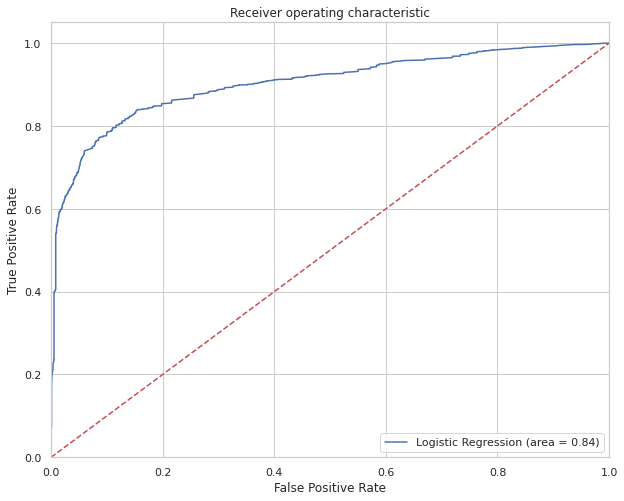

In [74]:
logit_roc_auc = roc_auc_score(ytest, logreg.predict(Xtest))
fpr, tpr, thresholds = roc_curve(ytest, logreg.predict_proba(Xtest)[:,1])
# plt.figure()
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show();